In [1]:
import pandas as pd
import warnings
from matplotlib import pyplot
from scipy.stats import norm

In [2]:
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
#Checking the Null Value
warnings.filterwarnings("ignore")
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# 1) Replacing Null Value

In [4]:
#Replacing Null Value

dataset.fillna(0,inplace = True)
dataset

#We are replacing the null values in the Salary column with 0, since this column directly depends on the job status (placed / Not Placed),
#so if the person is not placed, then we will not get the salary

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 2) How many of them are not placed

In [5]:
place_cnt = dataset[dataset["status"] != "Placed"].shape[0]
total = dataset.shape[0]
print(f"Out of {total} Students, '{place_cnt}' students were not placed and looking for the opportunity")

Out of 215 Students, '67' students were not placed and looking for the opportunity


# 3) Find the reason for non placement from the dataset

In [6]:
dataset[dataset["status"] != "Placed"]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


# Using Testing

In [7]:
from scipy.stats import ttest_ind

# T-test for SSLC scores
sslc_placed = dataset[dataset['status'] == 'Placed']['ssc_p']
sslc_not_placed = dataset[dataset['status'] != 'Placed']['ssc_p']
t_stat, p_val = ttest_ind(sslc_placed, sslc_not_placed)
print(f'T-Test SSLC Score: t-statistic = {t_stat}, p-value = {p_val}')

hsc_placed = dataset[dataset['status'] == 'Placed']['hsc_p']
hsc_not_placed = dataset[dataset['status'] != 'Placed']['hsc_p']
t_stat, p_val = ttest_ind(hsc_placed, hsc_not_placed)
print(f'T-Test HSC Score: t-statistic = {t_stat}, p-value = {p_val}')

degree_placed = dataset[dataset['status'] == 'Placed']['degree_p']
degree_not_placed = dataset[dataset['status'] != 'Placed']['degree_p']
t_stat, p_val = ttest_ind(degree_placed, degree_not_placed)
print(f'T-Test Degree Score: t-statistic = {t_stat}, p-value = {p_val}')

mba_placed = dataset[dataset['status'] == 'Placed']['mba_p']
mba_not_placed = dataset[dataset['status'] != 'Placed']['mba_p']
t_stat, p_val = ttest_ind(mba_placed, mba_not_placed)
print(f'T-Test MBA Score: t-statistic = {t_stat}, p-value = {p_val}')

print("\nFrom the above, H0 Null hypothesis is rejected, since we got our pvalue < 0.05. So, we accept Alternate Hypothesis stating that \nthere is a significant difference between columns when compared to placed and not placed students")



T-Test SSLC Score: t-statistic = 11.173294337111484, p-value = 4.115201043884403e-23
T-Test HSC Score: t-statistic = 8.230746477379519, p-value = 1.849212756931434e-14
T-Test Degree Score: t-statistic = 7.982429212839097, p-value = 8.807682138862608e-14
T-Test MBA Score: t-statistic = 1.1259706009659818, p-value = 0.26144500197748627

From the above, H0 Null hypothesis is rejected, since we got our pvalue < 0.05. So, we accept Alternate Hypothesis stating that 
there is a significant difference between columns when compared to placed and not placed students


# Using Chart

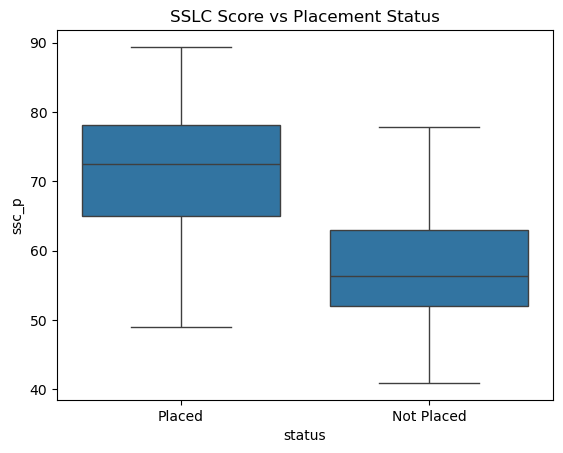

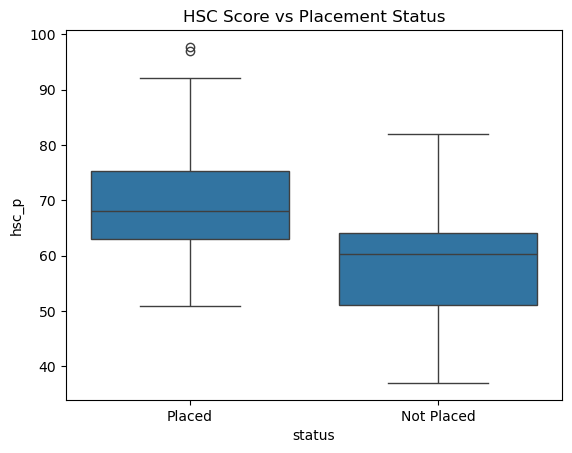

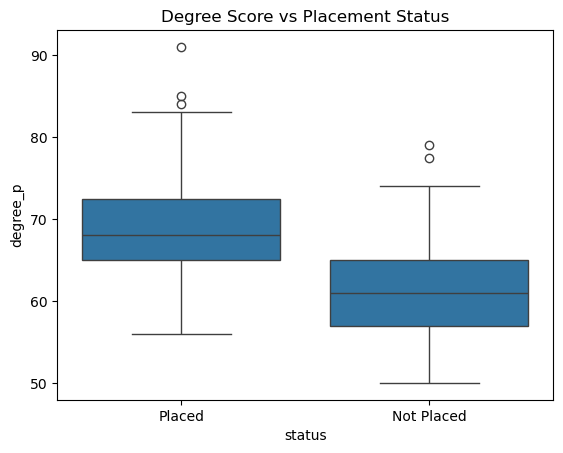

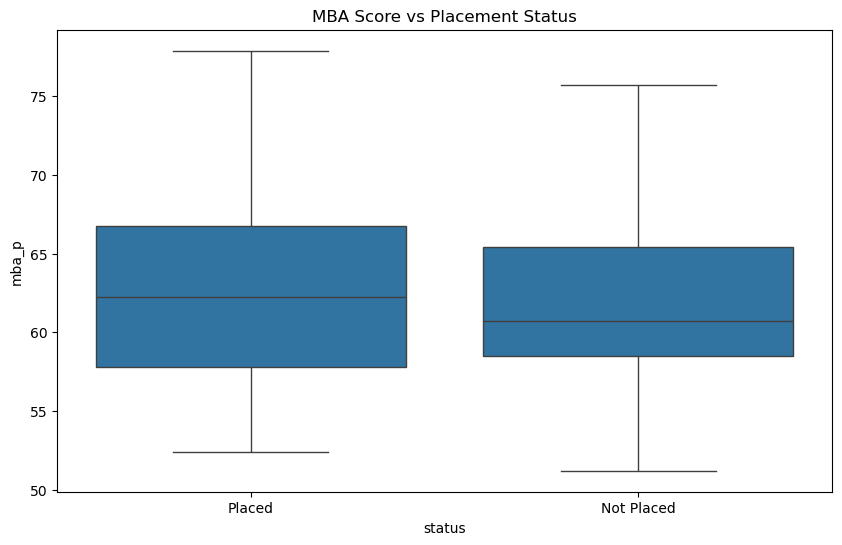

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plots to visualize the distribution of scores by placement status

sns.boxplot(x='status', y='ssc_p', data=dataset)
plt.title('SSLC Score vs Placement Status')
plt.show()

sns.boxplot(x='status', y='hsc_p', data=dataset)
plt.title('HSC Score vs Placement Status')
plt.show()


sns.boxplot(x='status', y='degree_p', data=dataset)
plt.title('Degree Score vs Placement Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='status', y='mba_p', data=dataset)
plt.title('MBA Score vs Placement Status')
plt.show()


In [9]:
print("Conclusion : From the above Comparison, we can assume that those who scored below '65%' in SSLC, HSC and DEGREE were not placed.")

Conclusion : From the above Comparison, we can assume that those who scored below '65%' in SSLC, HSC and DEGREE were not placed.


# 4) What kind of relation between salary and mba_p

In [10]:
print(dataset[["salary","mba_p"]].corr())
print("\n salary and mba_p is weekly correlated with '0.14' correlation")

          salary     mba_p
salary  1.000000  0.139823
mba_p   0.139823  1.000000

 salary and mba_p is weekly correlated with '0.14' correlation


# 5) Which specialization is getting minimum salary

In [11]:
min_sal_dataset = dataset[dataset["salary"] == dataset["salary"][dataset["status"] == "Placed"].min()]
salary = list(set(min_sal_dataset["salary"]))[0]
sepecialisation = ', '.join(list(set(min_sal_dataset["specialisation"]))).replace("'"," ")
print(f"Specialisations like '{sepecialisation}' getting minimum salary of {salary}")


Specialisations like 'Mkt&HR, Mkt&Fin' getting minimum salary of 200000.0


# 6) How many of them getting above 500000 salary

In [12]:
sal_5l = dataset[dataset["salary"] > 500000].shape[0]

print(f"Nearly {sal_5l} Members getting Salary greater than 5,00,000 Rupees")

Nearly 3 Members getting Salary greater than 5,00,000 Rupees


# 7) Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)


In [13]:
#Anavo Testing
#One way Classification
from scipy.stats import stats 
print(stats.f_oneway(dataset["etest_p"],dataset["mba_p"]))
#print(stats.f_oneway(dataset.groupby('etest_p')['mba_p'].apply(list)))
print("\nH0 Null hypothesis is rejected, since we got p(4.672547689133573e-21) < 0.05. So, we accept Alternate Hypothesis stating that \nthere is a significant difference between etest_p and mba_p")


F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

H0 Null hypothesis is rejected, since we got p(4.672547689133573e-21) < 0.05. So, we accept Alternate Hypothesis stating that 
there is a significant difference between etest_p and mba_p


# 8) Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)


In [14]:
from scipy.stats import ttest_ind
sciTech = dataset[dataset["degree_t"] == "Sci&Tech"]["salary"]
mktHr   = dataset[dataset["specialisation"] == "Mkt&HR"]["salary"]
print(ttest_ind(sciTech,mktHr))
print("\nH0 Null hypothesis is 'rejected', since we got p value (0.007) < 0.05. So, We accept alternated hypothesis, Which is stating that \nthere is a significance difference between Sci&Tech and Mkt&HR with respect to salary")

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

H0 Null hypothesis is 'rejected', since we got p value (0.007) < 0.05. So, We accept alternated hypothesis, Which is stating that 
there is a significance difference between Sci&Tech and Mkt&HR with respect to salary


# 9) Convert the normal distribution to standard normal distribution for salary column

<Axes: xlabel='salary', ylabel='Density'>

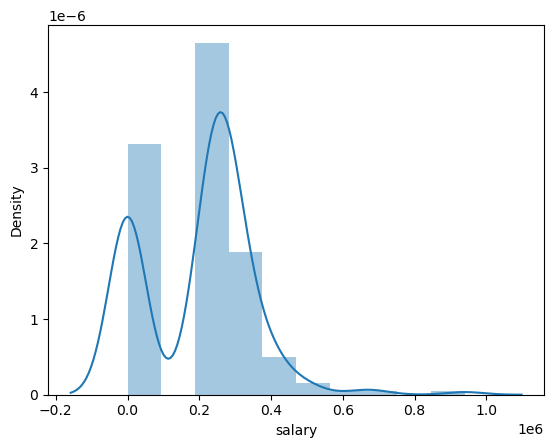

In [15]:
import seaborn as sns
sns.distplot(dataset["salary"]) 

<Axes: ylabel='Density'>

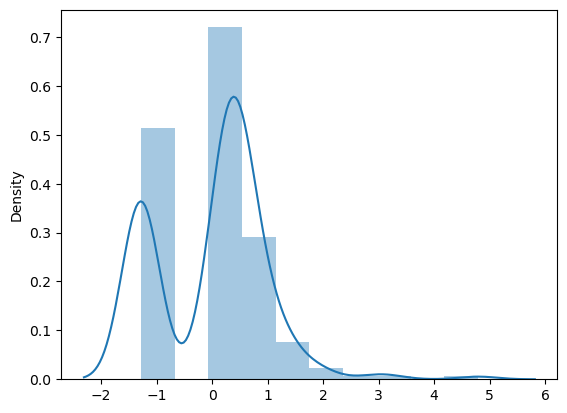

In [16]:
#Converting to Standard Normalisation
values = [value for value in dataset["salary"]] 
sd_mean = dataset["salary"].mean()
sd_std = dataset["salary"].std()
z_score = []
for j in values:    
    z_score.append((j - sd_mean)/sd_std)    

sns.distplot(z_score) 

# 10) What is the probability Density Function of the salary range from 700000 to 900000?

In [17]:
import numpy as np

# Generate 10 equally spaced values between 3 and 4
values = np.linspace(3.1, 4.1, num=10)
list(values)


[3.1,
 3.2111111111111112,
 3.3222222222222224,
 3.433333333333333,
 3.5444444444444443,
 3.6555555555555554,
 3.7666666666666666,
 3.8777777777777773,
 3.9888888888888885,
 4.1]

Mean : 198702.33, Standard Deviation : 154780.93
The Area Between the range 700000 and 900000 : 0.98313847


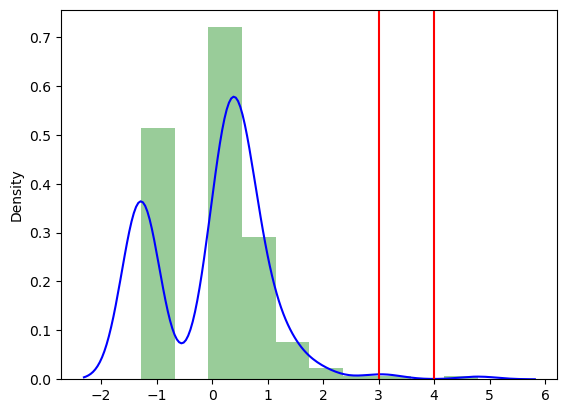

In [18]:
#PDF
#Converting to Standard Normalisation
ax = sns.distplot(z_score,kde = True,kde_kws = {'color':'blue'},color = 'green')
 
startRange = int((700000 - sd_mean)/sd_std)
endRange = int((900000 - sd_mean)/sd_std)

pyplot.axvline(startRange,color= "red")
pyplot.axvline(endRange,color= "red")

sample = dataset["salary"]
sample_mean = round(sample.mean(),2)
sample_std = round(sample.std(),2) 

values = [value for value in list(np.linspace(3.1, 4.1, num=10))]
dist = norm(startRange,endRange)
probs = [dist.pdf(value) for value in values] 

print(f"Mean : {sample_mean}, Standard Deviation : {sample_std}\nThe Area Between the range {700000} and {900000} : { round(sum(probs), 8) }")

# 11) Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)


In [19]:
from scipy.stats import ttest_rel
etest_p  = dataset[dataset["degree_t"] == "Sci&Tech"]["etest_p"]
mba_p  = dataset[dataset["degree_t"] == "Sci&Tech"]["mba_p"]
print(ttest_rel(etest_p,mba_p))
print("\nH0 Null hypothesis is 'rejected', since we got p value (5.517920600505392e-06) < 0.05. So we accept alternate Hypothesis, Which is stating that \nthere is a significance difference for Sci&Tech respect to etest_p and mba_p")

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

H0 Null hypothesis is 'rejected', since we got p value (5.517920600505392e-06) < 0.05. So we accept alternate Hypothesis, Which is stating that 
there is a significance difference for Sci&Tech respect to etest_p and mba_p


# 12) Which parameter is highly correlated with salary

In [20]:
correlation = dataset[["salary","ssc_p","hsc_p","etest_p","mba_p"]].corr()
correlation_obj = {
    "column" : "",
    "value"  : 0
}
for column in dataset[["ssc_p","hsc_p","etest_p","mba_p"]]:
  if(correlation[column]["salary"] > correlation_obj["value"]):
      correlation_obj["value"] = round(correlation[column]["salary"],2)
      correlation_obj["column"] = column
  print(f"{column} => {round(correlation[column]["salary"],2)}")
 
print(f"\n'{correlation_obj['column']}' is highly correlated with salary with correlation of '{correlation_obj['value']}' compared to other parameters.")

ssc_p => 0.54
hsc_p => 0.45
etest_p => 0.19
mba_p => 0.14

'ssc_p' is highly correlated with salary with correlation of '0.54' compared to other parameters.


# 13) plot any useful graph and explain it

<Axes: xlabel='salary', ylabel='Density'>

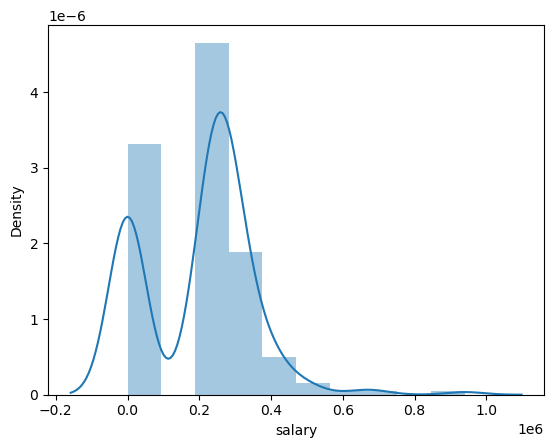

In [21]:
import seaborn as sns
sns.distplot(dataset["salary"]) 

In [22]:
print("Distplot is usefull to see the frequency distribution of the data through visual representation,(i.e) How the data is spread across the range.\nIt also shows the KDE (Kernal Density Estimate) for data distribution")

Distplot is usefull to see the frequency distribution of the data through visual representation,(i.e) How the data is spread across the range.
It also shows the KDE (Kernal Density Estimate) for data distribution
